QUESTION 1

Use of fundamental Python concepts to display numerical and categorical type columns seperately

In [98]:
# package imports

In [99]:
import csv

In [100]:
# code

In [101]:
def categorical_numerical(df):

    ''' accepts a csv filename as input and organises its columns into categorical and numerical types '''
    
    # dataframe is opened in 'read' mode;
    
    with open(f'{df}.csv', 'r') as csvfile: 

        # create a csv reader object;
        
        csv_reader = csv.DictReader(csvfile) 

        # create a dict with categories 
        # and the first row of their corresponding values;
        
        data_list = next(csv_reader) 

    # create empy lists to which each column will be categorized;
    
    numeric_columns = []
    categorical_columns = []        

    # iterate through rows...
    
    for i in data_list.values():
        try:
            
            # ...while casting {i} to a float value;
            
            float(i)

            # if {i == float value}, append {[key]} to {numeric_columns} list;
            
            numeric_columns.append(list(data_list.keys())[list(data_list.values()).index(i)])

        # elif: a ValueError exception is raised... 

            # ...cast the column to a string 
            #    value, and append to {categorical_columns} list;
        
        except ValueError:  
            str(i)
            categorical_columns.append(list(data_list.keys())[list(data_list.values()).index(i)])

    # a variable storing a multi-line string is created...
    
    ans = f'''
    the categorical columns consist of {categorical_columns}
    
    the numeric columns consist of {numeric_columns}
'''
    # ...and printed out to display these different types;
    
    print(ans)

In [102]:
# execution

In [103]:
categorical_numerical('Iris') # Iris Dataset


    the categorical columns consist of ['Species']
    
    the numeric columns consist of ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']



In [104]:
categorical_numerical('penguins_size') # Palmer Penguins Dataset


    the categorical columns consist of ['species', 'island', 'sex']
    
    the numeric columns consist of ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']



QUESTION 2

Use of Pandas to read datasets, concatenate datasets, remove duplicate rows
and display number of rows and columns, as well as utilising NumPy to 
calculate the correlation matrix for all numeric rows, and display the highest
correlation matrix value found within each dataset seperately 

In [59]:
# package imports

In [60]:
import numpy as np 
import pandas as pd
import copy

In [61]:
# code

In [92]:
# read and import df1, df2 with pandas
    
df_iris = pd.read_csv('Iris.csv')
df_penguins = pd.read_csv('penguins_size.csv')

# nested function within parent function {pandas_numpy_func()}...
# accepts a variable defined within parent function as a parameter;

def corrcoef(df):

    """ generates a correlation matrix for a given dataset and
    prints the pair of columns with the highest correlation coefficient """
    
    # remove categorical columns from df;
    
    df = df.select_dtypes(include = np.number)

    # drop NaN values;
    
    df = df.dropna()

    # convert df to a dictionary;
    
    df = df.to_dict('list')

    # copy this dictionary with {CSV} module;
    
    df_dupe = copy.deepcopy(df)

    # create an empty dictionary to which the correlation
    # matrix will be appended;
    
    corrcoef_dict = {}

    # iterate through dataframe, calculating the correlation matrix 
    # with {np.corrcoef()} method;
    
    for i in df.values():
        for j in df_dupe.values():

            # skip iterations where {i} and {j} are equal 
            # to avoid appending invalid correlation matrix
            # values (i.e. {np.corrcoef('sepal length (cm)', 'sepal length (cm)')[0, 1]});
            
            if i != j:

                # append correlation matrix values and keys to a seperate dict;
                
                corrcoef_dict.update({f'{list(df.keys())[list(df.values()).index(i)]}, {list(df.keys())[list(df.values()).index(j)]}': np.corrcoef(i, j)[0, 1]})

    # find the maximum value in the seperate dict i.e. {max_coef_value}
    # and display this key / value pair
    
    max_coef_val = max(corrcoef_dict.items())
    print(f'''
    the highest corrcoef in this dataset is: {max_coef_val}
    ''')

# accepts parameters df1, df2 as {'filename.csv'}

def pandas_numpy_func(df1, df2):

    """ accepts two datasets as input, concatenates both
    datasets, prints the amount of rows and columns, and creates 
    a correlation matrix for each seperate input dataset """
    
    # concatenate df1, df2 across rows;
    
    df_concat = pd.concat([df1, df2], axis = 0)
    df_concat = df_concat.drop_duplicates()

    # print rows and columns;
    
    print(f'''
    Rows: [{df_concat.shape[0]}]
    Columns: [{df_concat.shape[1]}]
    ''')

    # pass both dataframes through {corrcoef()} function
    # seperately to generate correlation matrix
    # information for each dataframe;
    
    corrcoef(df1)
    corrcoef(df2)    

In [93]:
# execution 

In [94]:
pandas_numpy_func(df_iris, df_penguins)


    Rows: [491]
    Columns: [12]
    

    the highest corrcoef in this dataset is: ('SepalWidthCm, SepalLengthCm', -0.1093692499506493)
    

    the highest corrcoef in this dataset is: ('flipper_length_mm, culmen_length_mm', 0.6561813407464281)
    


QUESTION 3

Use of basic Python concepts to write the Python code for the given pseudocode

In [51]:
# package imports

In [52]:
import numpy as np

In [53]:
# generate a random NumPy array with 1000 elements

numpy_array = np.random.rand(1000) 

# generate a new array containing the original values of numpy_array
# divided into sub-arrays of 5

divided_array = np.split(numpy_array, 200)

# generate an empty list to which the mean values of each sub-array of numpy_array
# will be appended

datamean = []

In [54]:
# functions

In [55]:
# a function to find the mean of a given array;

def mean(array):

    """ accepts an array as input and returns its mean value """
    
    mean = sum(array) / len(array) 

    # after which the mean value is then returned up the chain and stored;
    
    return(mean)  

# a function to store the mean values of each nested array within the parent array {divided_array};

def array_mean_values(parent_array):

    """ accepts an array as input and generates the
    mean value of each nested array, appends to 
    list {datamean[]} and returns {datamean[]} """

    # a for loop iterates through the parent array;
    
    for nested_array in parent_array:  

        # and converts the current iteration to its given mean value with user-defined {mean()} function;
        
        nested_array = mean(nested_array)

        # which is stored in the {datamean} list;
        
        datamean.append(nested_array)      

    return datamean

# a function to find the minimum value within a given array

def minimum(array):

    """ accepts an array as input and returns
    the minimum value within said array """
    
    # the minimum variable defaults to the highest possible value
    
    minimum = np.inf  

    # a for loop iterates through the array;
    
    for i in range(0, len(array)): 

        # if the current iteration value is less than that of the current minimum variable...
        
        if array[i] < minimum:  

            # ...the previous minimum variable is replaced with the current iteration value;
            
            minimum = array[i]      
    
    ans = f'''
    [data]min: {minimum}
    '''

    # minimum value is printed out to the script...
    
    print(ans)  

    # ...and returned up the chain to be stored;
    
    return minimum   

# a function to find the maximum value within a given array;

def maximum(array):

    """ accepts an array as input and returns
    the maximum value within said array """
    
    # functions the same as the minimum(array) function
    # only the maximum variable defaults to the lowest possible value;
    
    maximum = -np.inf   

    # and the for loop checks if the current iteration value is greater...
    
    for i in range(0, len(array)):  

        # ...than the current maximum variable value;
        
        if array[i] > maximum: 

            # the for loop will finish with the maximum variable storing
            # the highest value within the given array;
            
            maximum = array[i]      
    
    ans = f'''
    [data]max: {maximum}
    '''  
    
    print(ans)       
    return maximum   

def get_value_max(datamean_minimum, datamean_maximum):

    """ accepts two variables as input and returns the
    maximum absolute value between both variables """
    
    # this function generates the maximum absolute mean value
    # between {datamean_minimum, datamean_maximum}
    
    valuemax = max(abs(datamean_minimum), abs(datamean_maximum))

    print(f'''
    [value]max: {valuemax}
    ''')
    
    return valuemax

# all of the above functions are wrapped within 
# {Q3_numpy_array()}

def Q3_numpy_array():

    """ generates a random numpy array of 1000 elements,
    splits said array into 200 groups of 5 elements, returns
    a new array containing the mean values of the aforementioned
    200 nested arrays of 5 elements, returns the minimum and maximum
    mean values, and the maximum absolute mean value """
    
    numpy_array = np.random.rand(1000)
    divided_array = np.split(numpy_array, 200)
    datamean = []

    datamean = array_mean_values(divided_array)
    data_min = minimum(datamean)
    data_max = maximum(datamean)
    value_max = get_value_max(data_min, data_max)

In [56]:
# execution

In [57]:
Q3_numpy_array()


    [data]min: 0.19924907872666348
    

    [data]max: 0.8088864649866639
    

    [value]max: 0.8088864649866639
    


QUESTION 4

create code to connect to SQL server, interact with the given server 
by creating, viewing, editing, manipulating and working with DataBases using
SQL clauses and queries

In [5]:
# package imports

In [6]:
import mysql.connector

In [7]:
# code

In [22]:
# create a function which connects to SQL with basic default parameters set;

def SQL_Connector(ur = 'root', hn = 'localhost', p = '3306', pw = None, db = 'mysql'):

    """ a function which handles connecting to 
    an SQL server, accepts user, host, port,
    password, and database as arguments. each of
    these arguments have a default value assigned 
    except for password """
    
    # resets the variable {conn} to prevent any issues that 
    # could be caused as a result of multiple open connections;
    
    conn = None
    try:

        # input parameters are applied to the required variables
        # for establishing a server connection;
        
        conn = mysql.connector.connect(user = ur,
                                       host = hn,
                                       port = p,
                                       password = pw,
                                       database = db)

        # informs if the input database {db} has been connected successfully;
        
        print(f'DATABASE: {db} CONNECTED SUCCESSFULLY')
        print(conn)

    # informs of any incorrect inputs which throw an exception;
    
    except Exception as e:
        print(f'ERROR: {e}')

    # return the SQL object {conn};
    
    return conn
        

# object {conn} is returned;

conn = SQL_Connector(pw = 'qR1nC!p3s@LumAchin@')

# cursor object {mycursor} is created globally;

mycursor = conn.cursor()

DATABASE: mysql CONNECTED SUCCESSFULLY


In [35]:
# function to create new DataBases;

def CreateDB(conn, db = 'Untitled DataBase'):

    """ accepts connection and a database title
    as input and creates a new SQL database,
    if no title is input, title name defaults to
    'Untitled DataBase' """
    
    try:
        mycursor.execute(f'CREATE DATABASE {db}')

        print('DATABASE CREATED SUCCESSFULLY')

        # if DataBase is not explicitly named, it is named {'Untitled DataBase'} by default;
        
        if db == 'Untitled DataBase':

            # warns of potential overwriting of important DataBase info if left un-named;
            
            warning = F'''
            WARNING, NO NAME WAS ASSIGNED TO CREATED DATABASE: {db},
            TO AVOID POTENTIAL OVERWRITING OF DATABASE INFO,
            PLEASE RENAME THIS DATABASE BEFORE CREATING ANY NEW
            DATABASES.
            '''
            
            print(warning)

    # informs of any potential errors;
    
    except Exception as e:
        print(f'ERROR: {e}')

# DataBase {'horroricons'} is created;

CreateDB(conn, db = 'HorrorIcons')

DATABASE CREATED SUCCESSFULLY


In [36]:
# iterate through and display DataBases;

mycursor.execute('SHOW DATABASES')
for i in mycursor:
    print(i)

('horroricons',)
('information_schema',)
('mysql',)
('performance_schema',)
('progca1',)
('programmingca1',)
('sakila',)
('sys',)
('world',)


In [37]:
# create DataBase table;

mycursor.execute('CREATE TABLE IF NOT EXISTS horroricons (name VARCHAR(255), address VARCHAR(255))')

In [38]:
# iterate through and display existing tables;

mycursor.execute('SHOW TABLES')
for i in mycursor:
    print(i)

('capa1',)
('capsassessment01',)
('capstoneassessment1',)
('columns_priv',)
('component',)
('db',)
('default_roles',)
('engine_cost',)
('func',)
('general_log',)
('global_grants',)
('gtid_executed',)
('help_category',)
('help_keyword',)
('help_relation',)
('help_topic',)
('horroricons',)
('innodb_index_stats',)
('innodb_table_stats',)
('ndb_binlog_index',)
('password_history',)
('plugin',)
('procs_priv',)
('programmingai',)
('proxies_priv',)
('replication_asynchronous_connection_failover',)
('replication_asynchronous_connection_failover_managed',)
('replication_group_configuration_version',)
('replication_group_member_actions',)
('role_edges',)
('server_cost',)
('servers',)
('slave_master_info',)
('slave_relay_log_info',)
('slave_worker_info',)
('slow_log',)
('tables_priv',)
('time_zone',)
('time_zone_leap_second',)
('time_zone_name',)
('time_zone_transition',)
('time_zone_transition_type',)
('user',)


In [46]:
# creating table entries;

x = ('Nosferatu', 'Wismar, Germany')
y = ('Dr. Jekyll', 'Soho, LDN')
z = ('Beetlegeuse', 'East Corinth, Vermont')

# inserting table entries;

mycursor.execute('INSERT INTO horroricons (name, address) VALUES (%s, %s)', x)
mycursor.execute('INSERT INTO horroricons (name, address) VALUES (%s, %s)', y)
mycursor.execute('INSERT INTO horroricons (name, address) VALUES (%s, %s)', z)

# committing (saving) changes;

conn.commit()

# informs if record insertion(s) are/is successful;

print('Record inserted.')

Record inserted.


In [47]:
# a function to display DataBase table entries;

def DisplayTable(table):

    """ accepts an SQL database table as input and 
    displays all items within said table """

    # query selects items from table;
    
    mycursor.execute(f'SELECT * FROM {table}')
    result = mycursor.fetchall()

    # iterates through and displays each row in table;
    
    for row in result:
        print(row)

# execution;

DisplayTable('horroricons')

('Nosferatu', 'Wismar, Germany')
('Dr. Jekyll', 'Soho, LDN')
('Beetlegeuse', 'East Corinth, Vermont')


In [48]:
# removes table entries by {'name'};

def RemoveFromTable(table, location, item):

    """ accepts a table, column name and row element as input,
    function to remove an item from an SQL database table."""

    # action;
    
    action = f'DELETE FROM {table} WHERE {location} = %s'
    adr = (f'{item}', )
    
    mycursor.execute(action, adr)
    
    conn.commit()

    # displays deleted record(s) and returns object {conn};
    
    print(mycursor.rowcount, f'record(s) deleted: [{item}] from column: [{location}]') 
    return conn

# some would argue the film BeetleJuice is moreso a dark comedy than a horror, therefore 
# I will appease these people by removing character: {'Beetlegeuse'}, from DataBase: {'horroricons'};

RemoveFromTable(table = 'horroricons', 
                location = 'name', 
                item = 'Beetlegeuse')

# I will now verify these changes were made by viewing the table again;

DisplayTable('horroricons')

1 record(s) deleted: [Beetlegeuse] from column: [name]
('Nosferatu', 'Wismar, Germany')
('Dr. Jekyll', 'Soho, LDN')


In [115]:
# now that the important queries have been wrapped up in functions,
# I will create a new function {GenericQuery()} which will handle
# any other more obscure queries I may need to use while 
# working with this SQL DataBase;

def GenericQuery(conn, query):

    """ accepts connection and an SQL query as input,
    a function to handle generic SQL queries """
    
    try:
        mycursor.execute(query)
        conn.commit()

        # informs if query has been implemented successfully
        
        print(f'QUERY: [{query}] SUCCESSFUL')
        
    except Exception as e:
        print(f'ERROR: {e}')

# test functionality of {GenericQuery()} by creating a new DataBase table for Beetlegeuse,
# {'comedyicons'};

GenericQuery(conn, 'CREATE TABLE IF NOT EXISTS comedyicons (name VARCHAR(255), address VARCHAR(255))')

QUERY: [CREATE TABLE IF NOT EXISTS comedyicons (name VARCHAR(255), address VARCHAR(255))] SUCCESSFUL


QUESTION 5

conduct a comprehensive exploratory data analysis on the Iris dataset from the sklearn dataset library

In [ ]:
# imports

In [120]:
import pandas as pd
import numpy as np
from sklearn import datasets 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [183]:
# load iris from sklearn library;

In [184]:
iris = datasets.load_iris()

In [187]:
# convert iris into a pandas dataframe;

In [189]:
df_iris = pd.DataFrame(iris.data, columns = iris.feature_names)

df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
# the dataframe is missing the 'species' column, so I will
# leverage functionalities from the pandas library to 
# append the 'species' column to the dataframe;

In [190]:
df_iris = pd.DataFrame(data = np.c_[iris['data'], iris['target']],
                  columns = iris['feature_names'] + ['target']).astype({'target': int}) \
       .assign(species = lambda x: x['target'].map(dict(enumerate(iris['target_names']))))

df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [ ]:
# now, that I have all necessary columns in the dataframe, I will
# now drop any duplicate rows that may be present with method {pandas.drop_duplicates()};

In [191]:
df_iris.drop_duplicates()

df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [ ]:
# the string values in the {'species'} column must be represented with integer
# values before any further analysis can take place. I will first approach this
# by removing the {'species'} column from the dataframe with method {df.drop()};

In [192]:
df_iris = df_iris.drop('species', axis = 'columns')

df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
# I will now rename the {'target'} column as {'species'} in order to 
# enable further analysis of the Iris dataframe;

In [193]:
df_iris.rename(columns = {'target': 'species'}, inplace = True)

df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [194]:
# check for missing values;

In [195]:
missing = df_iris.isnull()

missing

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [196]:
# view the first and last 5 rows of the dataset;

In [197]:
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
# view the first 10 rows;

In [124]:
df_iris.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [ ]:
# view the last 10 rows;

In [125]:
df_iris.tail(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
140,6.7,3.1,5.6,2.4,2
141,6.9,3.1,5.1,2.3,2
142,5.8,2.7,5.1,1.9,2
143,6.8,3.2,5.9,2.3,2
144,6.7,3.3,5.7,2.5,2
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [126]:
# data summary;

In [127]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [128]:
# general important values;

In [129]:
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [130]:
# check for unique values and generate table to display findings;

In [131]:
unique = df_iris.nunique()

unique

sepal length (cm)    35
sepal width (cm)     23
petal length (cm)    43
petal width (cm)     22
species               3
dtype: int64

In [ ]:
# generate a correlation matrix for the dataset;

In [159]:
matrix = df_iris.corr()

print(matrix)

                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   
species                     0.782561         -0.426658           0.949035   

                   petal width (cm)   species  
sepal length (cm)          0.817941  0.782561  
sepal width (cm)          -0.366126 -0.426658  
petal length (cm)          0.962865  0.949035  
petal width (cm)           1.000000  0.956547  
species                    0.956547  1.000000  


In [132]:
# a function to sort the dataset based on desired row in descending or ascending order;

In [181]:
def sort_df(df, column, ascending_TF):

    """ organises a dataset in ascending or
    descending order of the input column """
    
    df = df.sort_values(by = f'{column}', ascending = bool(f'{ascending_TF}'))
    return df

df_sorted = sort_df(df_iris, 
                    'petal width (cm)',
                    True)

df_sorted.head(15)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
32,5.2,4.1,1.5,0.1,0
13,4.3,3.0,1.1,0.1,0
37,4.9,3.6,1.4,0.1,0
9,4.9,3.1,1.5,0.1,0
12,4.8,3.0,1.4,0.1,0
0,5.1,3.5,1.4,0.2,0
27,5.2,3.5,1.5,0.2,0
28,5.2,3.4,1.4,0.2,0
29,4.7,3.2,1.6,0.2,0
30,4.8,3.1,1.6,0.2,0


In [182]:
# data visualisation;

In [174]:
def LengthWidth_Species(x_, y_, hue_ = 'species',
                        col = 'bright', 
                        df = df_iris):

    """ a function to generate a scatterplot, in this
    case, parameter {hue} defaults to {'species'}, but 
    the function can be utilised to create a scatterplot
    with any combination of key data points """
    
    sns.scatterplot(x = x_,
                    y = y_,
                    hue = hue_, 
                    palette = col,
                    data = df)
    
    plt.legend(bbox_to_anchor=(1, 1), loc=2)
    plt.show()

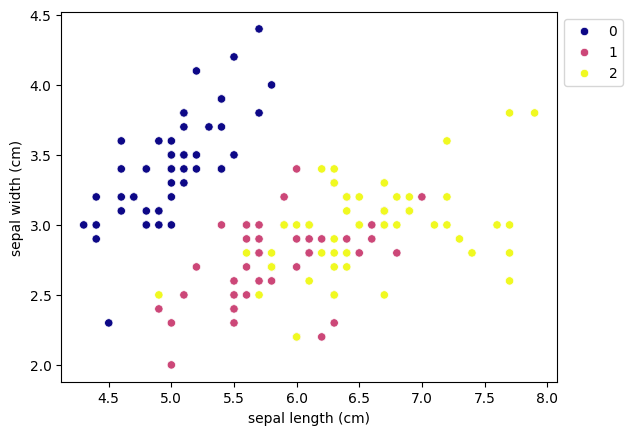

In [175]:
LengthWidth_Species(x_ = 'sepal length (cm)',
                    y_ = 'sepal width (cm)',
                    col = 'plasma')

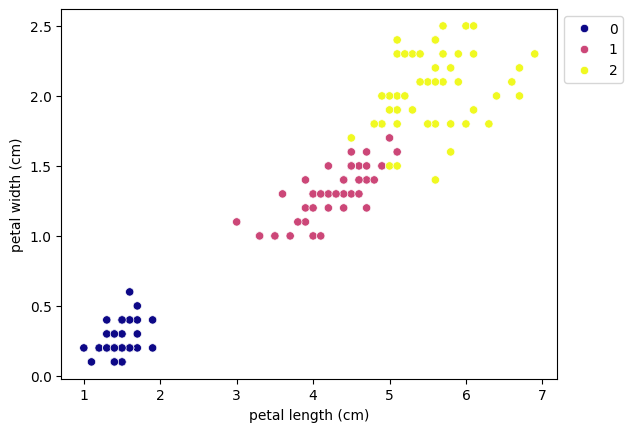

In [176]:
LengthWidth_Species(x_ = 'petal length (cm)', 
                    y_ = 'petal width (cm)', 
                    col = 'plasma')

In [ ]:
# create a group of plots to display relationships between all elements in the Iris dataset;

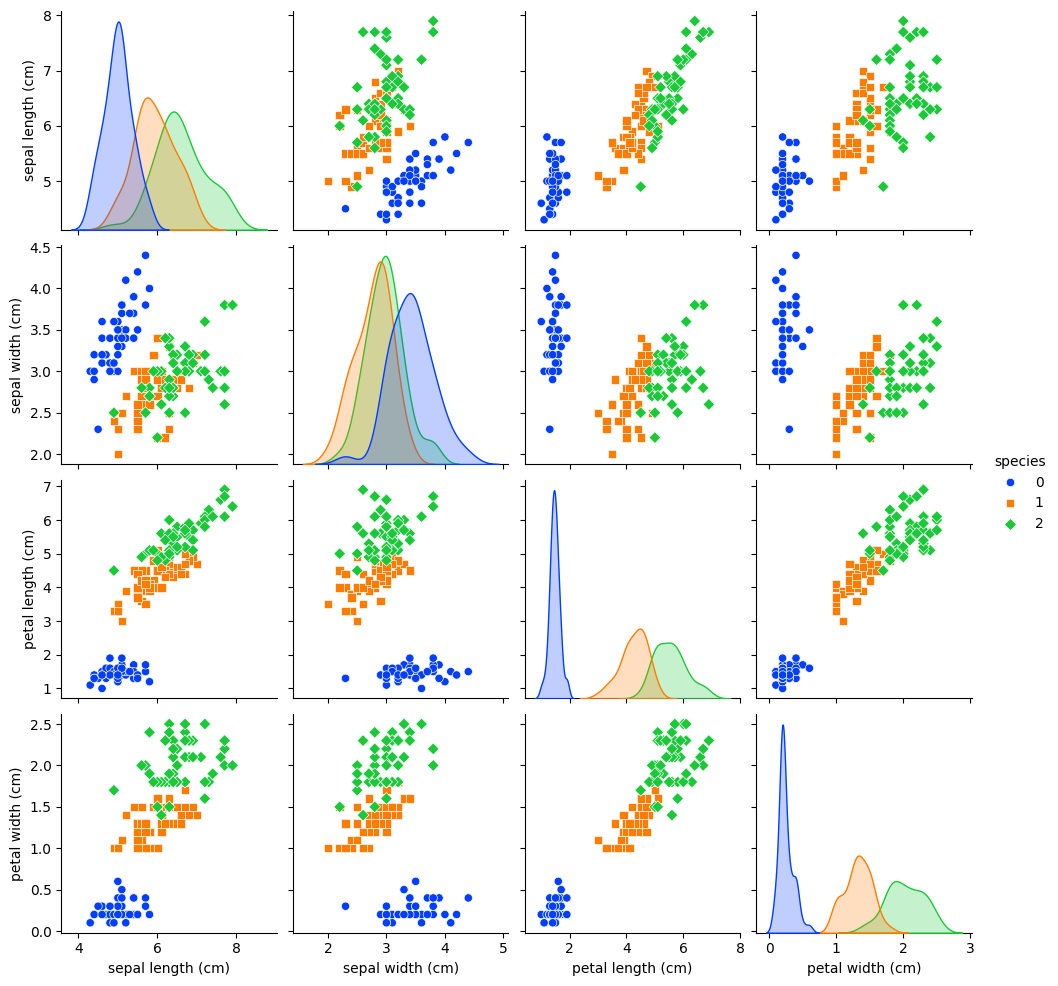

In [152]:
sns.pairplot(df_iris, 
             hue = "species",
             palette = "bright",
             markers = ["o", "s", "D"])

In [ ]:
# create a group of histograms with PyPlot to display differences between each species

(array([11., 46., 68., 21.,  4.]),
 array([2.  , 2.48, 2.96, 3.44, 3.92, 4.4 ]),
 <BarContainer object of 5 artists>)

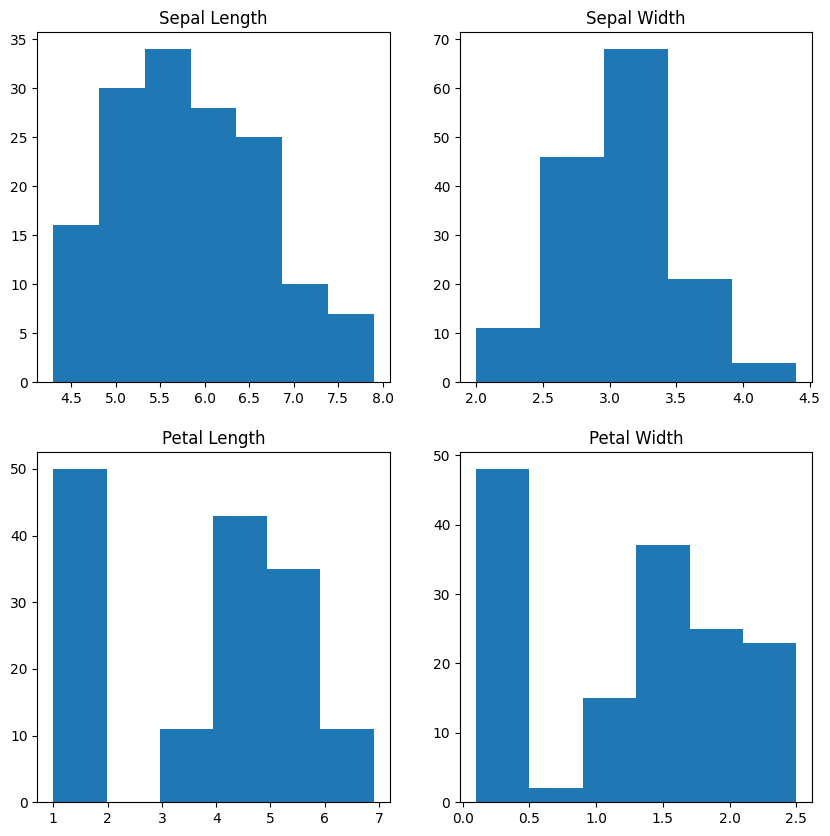

In [177]:
fig, axes = plt.subplots(2, 2, figsize = (10, 10))

axes[1,0].set_title("Petal Length")
axes[1,0].hist(df_iris['petal length (cm)'], bins = 6)

axes[1,1].set_title("Petal Width")
axes[1,1].hist(df_iris['petal width (cm)'], bins = 6)

axes[0,0].set_title("Sepal Length")
axes[0,0].hist(df_iris['sepal length (cm)'], bins = 7)

axes[0,1].set_title("Sepal Width")
axes[0,1].hist(df_iris['sepal width (cm)'], bins = 5)

In [ ]:
# create a heatmap to display the dataset correlation matrix;

<Axes: >

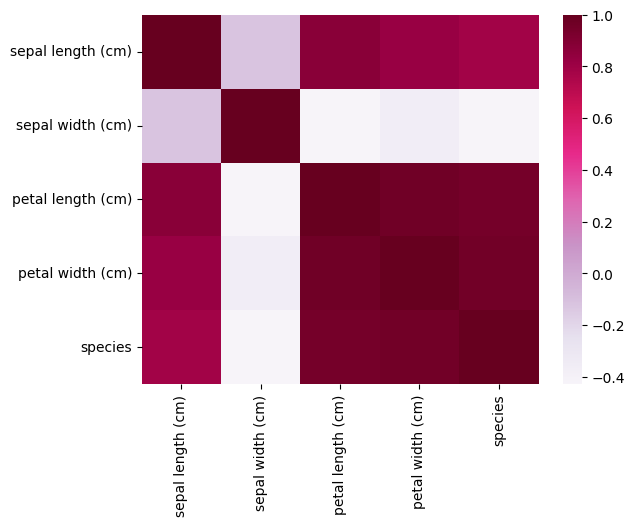

In [170]:
sns.heatmap(matrix,
            cmap = 'PuRd')